# **지하철 승하차 인원 분석**

---

## 프로젝트 개요

코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에 어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면 혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 `서울시 지하철 호선별 역별 승하차 인원 정보` 데이터를 분석하고 `지하철 역 위치 좌표` 데이터를 활용해 특정 호선에서 어떤 역이 가장 혼잡한지 직관적으로 확인해봅니다.

## 프로젝트 목표

- 승차 또는 하차 시 해당 시간, 해당 역의 승객 수를 확인하기 위해 **개찰구 통과 승객 수** 데이터와 **지하철 위치좌표** 데이터를 활용
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 승하차 인원 정보 데이터를 불러오고 DataFrame 구조를 확인<br>
    1.1. 데이터 불러오기<br>
    1.2. 데이터 확인하기<br>
<br>
2. **데이터 정제:** 데이터 확인 후 형 변환 및 이상치 데이터 처리<br>
    2.1. 2021년 6월 승하차 인원만 추출<br>
<br>
3. **데이터 시각화:** 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악<br>
    3.1. 호선 별 이용객 수 출력<br>
    3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출<br>
    3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력<br>
    3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합<br>
    3.5. 특정 호선의 혼잡 정도를 지도에 출력<br>

---

## 데이터 출처
- 서울시 지하철 호선별 역별 승하차 인원 정보 데이터: http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

---

## 1.데이터 읽기

필요한 패키지 설치 및 `import`한 후 `pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

### 1.1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

먼저, 서울시 지하철 호선별 역별 승하차 인원 정보 데이터를 불러와 `metro_all`에 저장합니다.

In [2]:
# 공유 폴더의 데이터 다운로드 : '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_202410.csv'
#!gdown 1S4W1P8cFQZhOOU1p9y_Gj_-jVd-k7oVy

In [3]:
# pd.read_csv를 통하여 승하차 인원 정보 데이터를 데이터프레임 형태로 읽어옵니다. - '서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_202410.csv'
metro_all = pd.read_csv("서울시 지하철 호선별 역별 시간대별 승하차 인원 정보_202410.csv", encoding = 'cp949')

In [4]:
# 승하차 인원 정보 상위 5개 데이터를 출력합니다.
metro_all.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202410,1호선,동대문,634,22,12458,1990,10170,7253,16816,...,9969,771,2838,4,231,0,0,0,0,20241103
1,202410,1호선,동묘앞,223,4,3169,1026,3758,5319,9258,...,4882,106,1831,0,263,0,0,0,0,20241103
2,202410,1호선,서울역,573,9,8623,9367,14928,61884,42711,...,13969,2848,3802,1,207,0,0,0,0,20241103
3,202410,1호선,시청,84,1,2078,5753,4249,30299,8265,...,3775,506,979,1,41,0,0,0,0,20241103
4,202410,1호선,신설동,384,22,9813,2340,10345,10232,22756,...,9779,375,2781,0,1,0,1,0,0,20241103


In [5]:
# 승하차 인원 정보 데이터프레임 정보를 요약하여 출력합니다.
...        # ... 코드 입력

### 1.2. 데이터 확인하기

불러온 두 데이터프레임의 특정 컬럼 데이터를 **중복없이 오름차순 정렬하여** 확인해봅시다.
- 중복없이 : set()
- 정렬을 하려면 : list()
- 정렬 : sorted()

In [6]:
# metro_all DataFrame 사용월 데이터 확인
sorted(list(set(metro_all['사용월'])))

[201501,
 201502,
 201503,
 201504,
 201505,
 201506,
 201507,
 201508,
 201509,
 201510,
 201511,
 201512,
 201601,
 201602,
 201603,
 201604,
 201605,
 201606,
 201607,
 201608,
 201609,
 201610,
 201611,
 201612,
 201701,
 201702,
 201703,
 201704,
 201705,
 201706,
 201707,
 201708,
 201709,
 201710,
 201711,
 201712,
 201801,
 201802,
 201803,
 201804,
 201805,
 201806,
 201807,
 201808,
 201809,
 201810,
 201811,
 201812,
 201901,
 201902,
 201903,
 201904,
 201905,
 201906,
 201907,
 201908,
 201909,
 201910,
 201911,
 201912,
 202001,
 202002,
 202003,
 202004,
 202005,
 202006,
 202007,
 202008,
 202009,
 202010,
 202011,
 202012,
 202101,
 202102,
 202103,
 202104,
 202105,
 202106,
 202107,
 202108,
 202109,
 202110,
 202111,
 202112,
 202201,
 202202,
 202203,
 202204,
 202205,
 202206,
 202207,
 202208,
 202209,
 202210,
 202211,
 202212,
 202301,
 202302,
 202303,
 202304,
 202305,
 202306,
 202307,
 202308,
 202309,
 202310,
 202311,
 202312,
 202401,
 202402,
 202403,
 

In [7]:
# metro_all DataFrame '호선명' 데이터 확인
...        # ... 코드 입력

In [8]:
# DataFrame '지하철역' 데이터 확인
...        # ... 코드 입력

In [9]:
# DataFrame 지하철역 데이터 개수 확인
...        # ... 코드 입력

---

## 2.데이터 정제

데이터를 확인해보니 2015년 1월부터 2024년 10월까지 수집된 데이터인 것을 알 수 있습니다.

이번 프로젝트에서는 **가장 최근 한달간 수집된 데이터**를 기준으로 특정 호선에서 어떤 역이 가장 혼잡한지 확인하고자 합니다.

### 2.1. 최근 한달(2024년 10월) 승하차 인원만 추출

수집된 데이터 중 가장 최근인 10월에 수집한 데이터만 추출하고 불필요한 컬럼을 제거해봅시다.

In [10]:
# 2024년 10월 총 승객수만 추출
metro_recent = ...        # ... 코드 입력
metro_recent

Ellipsis

In [11]:
# 불필요한 '작업일자' 컬럼 제거
metro_recent = ...        # ... 코드 입력
metro_recent

Ellipsis

---

## 3.데이터 시각화

2024년 10월 데이터만 추출한 `metro_recent`를 활용하여 다양한 데이터 시각화 및 혼잡도 분석을 진행해봅시다.

### 3.1. 호선 별 이용객 수 출력

추출한 `metro_recent` 데이터를 활용해 이용객 수가 가장 많은 호선 순으로 막대그래프를 출력해 보겠습니다.

In [12]:
# 한글 지원 그래프 출력을 위한 라이브러리 설치 및 가져오기
!pip install -q koreanize-matplotlib
import koreanize_matplotlib

In [13]:
numeric_col = metro_recent.select_dtypes(exclude='object').columns
numeric_col

AttributeError: 'ellipsis' object has no attribute 'select_dtypes'

- 지하철 호선별로 각 숫자형 데이터에 대해 평균을 계산

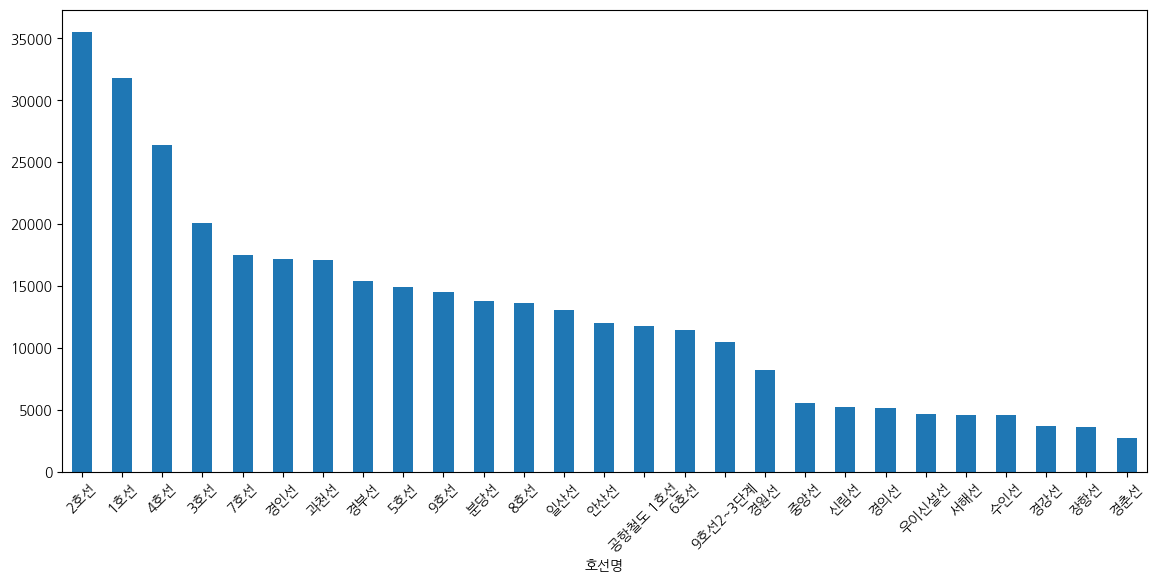

In [ ]:
# '호선명' 기준으로 그룹화한 뒤, numeric_col에 포함된 숫자형 열들의 평균값을 계산하고 index를 reset 하기
metro_line = ...        # ... 코드 입력
# '사용월' 열은 삭제하고, '호선명'을 인덱스로 설정
metro_line = ...        # ... 코드 입력
# 행(row) 기준으로 모든 열의 평균값을 계산, 내림차순으로 정렬
metro_line = ...        # ... 코드 입력

plt.figure(figsize=(14,6))
# metro_line 데이터 프레임을 막대그래프로 표현하기
...        # ... 코드 입력
plt.xticks(rotation=45)

# 막대 그래프를 가로방향을 출력
# plt.figure(figsize=(10,20))
# metro_line.plot(kind=('barh'))

plt.show()

### 3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출

다양한 호선에서 역별 평균 승하차 인원이 많은 역은 어디일까요? 이용객이 가장 많은 2호선 기준으로 확인해봅시다.

In [ ]:
# 호선명, 지하철역별로 각 숫자형 열(예: 시간대별 승하차 인원)의 평균값을 담은 데이터프레임
metro_st = metro_recent.groupby(['호선명','지하철역']).mean().reset_index()

# 2호선만 추출
line = '2호선'
metro_st_line2 = ...        # ... 코드 입력
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202410.0,148.0,4.0,8113.0,11256.0,18052.0,59663.0,39807.0,...,68924.0,23190.0,11657.0,6444.0,6.0,114.0,0.0,0.0,0.0,0.0
11,2호선,강변(동서울터미널),202410.0,26.0,0.0,9024.0,2088.0,24246.0,24771.0,67440.0,...,6071.0,17773.0,782.0,4555.0,0.0,77.0,0.0,0.0,0.0,0.0
12,2호선,건대입구,202410.0,363.0,7.0,15774.0,2020.0,22857.0,16300.0,55025.0,...,41354.0,33151.0,6663.0,10871.0,8.0,1029.0,2.0,3.0,0.0,0.0
13,2호선,교대(법원.검찰청),202410.0,19.0,2.0,2952.0,6799.0,11484.0,29300.0,25562.0,...,15543.0,11949.0,2886.0,3197.0,8.0,44.0,0.0,0.0,0.0,0.0
14,2호선,구로디지털단지,202410.0,510.0,35.0,42932.0,4805.0,55377.0,19371.0,139962.0,...,18273.0,49035.0,3198.0,13945.0,3.0,468.0,0.0,0.0,0.0,0.0
15,2호선,구의(광진구청),202410.0,89.0,3.0,13908.0,1799.0,26912.0,42195.0,70836.0,...,8471.0,23371.0,1338.0,6893.0,4.0,146.0,0.0,0.0,0.0,0.0
16,2호선,낙성대(강감찬),202410.0,32.0,3.0,12192.0,2369.0,28062.0,10562.0,83192.0,...,8764.0,31354.0,1527.0,8391.0,3.0,191.0,0.0,0.0,0.0,0.0
17,2호선,당산,202410.0,43.0,6.0,9015.0,3841.0,19219.0,13320.0,48504.0,...,9299.0,20442.0,1487.0,5030.0,3.0,176.0,0.0,1.0,0.0,0.0
18,2호선,대림(구로구청),202410.0,992.0,42.0,40227.0,3447.0,30519.0,11369.0,67119.0,...,5509.0,23018.0,681.0,5600.0,4.0,297.0,0.0,0.0,0.0,0.0
19,2호선,도림천,202410.0,1.0,0.0,378.0,353.0,1375.0,887.0,3331.0,...,261.0,881.0,40.0,292.0,1.0,8.0,0.0,0.0,0.0,0.0


In [ ]:
## 방법1
# metro_st_line2 에서 '승차인원' 이름이 포함된 열만 선택 - 컴프리헨션 사용
on_columns = [col for col in metro_st_line2.columns if '승차인원' in col]

# 승차 인원 데이터프레임 생성
metro_get_on = metro_st_line2[['지하철역'] + on_columns]

# '지하철역'을 인덱스로 설정
metro_get_on = metro_get_on.set_index('지하철역')

metro_get_on


,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,148.0,8113.0,18052.0,39807.0,62260.0,55503.0,56166.0,73333.0,90028.0,103821.0,...,310065.0,209257.0,162387.0,176696.0,152466.0,68924.0,11657.0,6.0,0.0,0.0
강변(동서울터미널),26.0,9024.0,24246.0,67440.0,102900.0,76719.0,61730.0,54819.0,49804.0,47907.0,...,58419.0,42867.0,34716.0,29271.0,17463.0,6071.0,782.0,0.0,0.0,0.0
건대입구,363.0,15774.0,22857.0,55025.0,92401.0,65147.0,44187.0,42710.0,49059.0,54397.0,...,90451.0,69703.0,71638.0,73845.0,70545.0,41354.0,6663.0,8.0,2.0,0.0
교대(법원.검찰청),19.0,2952.0,11484.0,25562.0,37053.0,30507.0,28551.0,34314.0,36832.0,43697.0,...,131212.0,62845.0,53653.0,50617.0,41006.0,15543.0,2886.0,8.0,0.0,0.0
구로디지털단지,510.0,42932.0,55377.0,139962.0,184466.0,119390.0,75156.0,67780.0,73705.0,72146.0,...,197052.0,98596.0,62594.0,50983.0,39644.0,18273.0,3198.0,3.0,0.0,0.0
구의(광진구청),89.0,13908.0,26912.0,70836.0,115238.0,72348.0,42072.0,34996.0,36762.0,35230.0,...,45775.0,27706.0,20153.0,17868.0,14947.0,8471.0,1338.0,4.0,0.0,0.0
낙성대(강감찬),32.0,12192.0,28062.0,83192.0,124349.0,81774.0,47921.0,42414.0,44861.0,43994.0,...,53131.0,31444.0,25772.0,22362.0,17024.0,8764.0,1527.0,3.0,0.0,0.0
당산,43.0,9015.0,19219.0,48504.0,57907.0,37410.0,28290.0,26660.0,27169.0,26291.0,...,57413.0,27863.0,24452.0,22955.0,18584.0,9299.0,1487.0,3.0,0.0,0.0
대림(구로구청),992.0,40227.0,30519.0,67119.0,97074.0,66066.0,42750.0,36575.0,38432.0,37980.0,...,51591.0,26077.0,19432.0,15152.0,10989.0,5509.0,681.0,4.0,0.0,0.0


In [ ]:
## 방법2

# 승차 인원 데이터만 포함할 빈 데이터프레임 생성
# metro_get_on = pd.DataFrame()

# # 신규 데이터프레임에 '지하철역' 항목 추가
# metro_get_on['지하철역'] = metro_st_line2['지하철역']

# #  전체 컬럼에서 호선명, 지하철역, 사용월(총 3개)을 제외후 승차,하차 데이터가 쌍을 이루고 있어 2로 나
# for i in range(int((len(metro_recent.columns)-3)/2)):
#     metro_get_on[metro_st_line2.columns[3+2*i]] = metro_st_line2[metro_st_line2.columns[3+2*i]]
# metro_get_on = metro_get_on.set_index('지하철역')
# metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,148.0,8113.0,18052.0,39807.0,62260.0,55503.0,56166.0,73333.0,90028.0,103821.0,...,310065.0,209257.0,162387.0,176696.0,152466.0,68924.0,11657.0,6.0,0.0,0.0
강변(동서울터미널),26.0,9024.0,24246.0,67440.0,102900.0,76719.0,61730.0,54819.0,49804.0,47907.0,...,58419.0,42867.0,34716.0,29271.0,17463.0,6071.0,782.0,0.0,0.0,0.0
건대입구,363.0,15774.0,22857.0,55025.0,92401.0,65147.0,44187.0,42710.0,49059.0,54397.0,...,90451.0,69703.0,71638.0,73845.0,70545.0,41354.0,6663.0,8.0,2.0,0.0
교대(법원.검찰청),19.0,2952.0,11484.0,25562.0,37053.0,30507.0,28551.0,34314.0,36832.0,43697.0,...,131212.0,62845.0,53653.0,50617.0,41006.0,15543.0,2886.0,8.0,0.0,0.0
구로디지털단지,510.0,42932.0,55377.0,139962.0,184466.0,119390.0,75156.0,67780.0,73705.0,72146.0,...,197052.0,98596.0,62594.0,50983.0,39644.0,18273.0,3198.0,3.0,0.0,0.0
구의(광진구청),89.0,13908.0,26912.0,70836.0,115238.0,72348.0,42072.0,34996.0,36762.0,35230.0,...,45775.0,27706.0,20153.0,17868.0,14947.0,8471.0,1338.0,4.0,0.0,0.0
낙성대(강감찬),32.0,12192.0,28062.0,83192.0,124349.0,81774.0,47921.0,42414.0,44861.0,43994.0,...,53131.0,31444.0,25772.0,22362.0,17024.0,8764.0,1527.0,3.0,0.0,0.0
당산,43.0,9015.0,19219.0,48504.0,57907.0,37410.0,28290.0,26660.0,27169.0,26291.0,...,57413.0,27863.0,24452.0,22955.0,18584.0,9299.0,1487.0,3.0,0.0,0.0
대림(구로구청),992.0,40227.0,30519.0,67119.0,97074.0,66066.0,42750.0,36575.0,38432.0,37980.0,...,51591.0,26077.0,19432.0,15152.0,10989.0,5509.0,681.0,4.0,0.0,0.0


In [ ]:
# '하차인원' 이름이 포함된 열만 선택
off_columns = [col for col in metro_st_line2.columns if '하차인원' in col]

# 하차 데이터프레임 생성
metro_get_off = metro_st_line2[['지하철역'] + off_columns]

# '지하철역'을 인덱스로 설정
metro_get_off = metro_get_off.set_index('지하철역')
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,4.0,11256.0,59663.0,152310.0,305899.0,314095.0,152585.0,106734.0,105127.0,117232.0,...,174771.0,105117.0,60203.0,50949.0,40501.0,23190.0,6444.0,114.0,0.0,0.0
강변(동서울터미널),0.0,2088.0,24771.0,25696.0,43235.0,35234.0,35771.0,34376.0,37966.0,43070.0,...,94343.0,66098.0,47370.0,39054.0,33338.0,17773.0,4555.0,77.0,0.0,0.0
건대입구,7.0,2020.0,16300.0,25536.0,62031.0,50865.0,47813.0,50082.0,56610.0,61679.0,...,150214.0,103424.0,67678.0,63437.0,56818.0,33151.0,10871.0,1029.0,3.0,0.0
교대(법원.검찰청),2.0,6799.0,29300.0,57156.0,158293.0,133685.0,70387.0,60047.0,56263.0,59699.0,...,72199.0,42808.0,26831.0,24186.0,22560.0,11949.0,3197.0,44.0,0.0,0.0
구로디지털단지,35.0,4805.0,19371.0,79748.0,216630.0,136902.0,59696.0,48709.0,52578.0,65937.0,...,165330.0,130138.0,89446.0,87677.0,83942.0,49035.0,13945.0,468.0,0.0,0.0
구의(광진구청),3.0,1799.0,42195.0,18134.0,39391.0,22998.0,22075.0,22034.0,24872.0,28227.0,...,96236.0,69340.0,47611.0,45174.0,41656.0,23371.0,6893.0,146.0,0.0,0.0
낙성대(강감찬),3.0,2369.0,10562.0,20658.0,45186.0,38184.0,31560.0,27405.0,30677.0,33338.0,...,103114.0,84639.0,56794.0,54858.0,52760.0,31354.0,8391.0,191.0,0.0,0.0
당산,6.0,3841.0,13320.0,28489.0,74151.0,33936.0,19287.0,18611.0,22038.0,24544.0,...,78876.0,53746.0,37373.0,35362.0,30990.0,20442.0,5030.0,176.0,1.0,0.0
대림(구로구청),42.0,3447.0,11369.0,21971.0,51775.0,35374.0,34053.0,36120.0,34487.0,35829.0,...,71064.0,52445.0,42265.0,50676.0,45996.0,23018.0,5600.0,297.0,0.0,0.0


In [ ]:
# 방법2
# 하차 인원 컬럼만 추출
# metro_get_off = pd.DataFrame()
# metro_get_off['지하철역'] = metro_st_line2['지하철역']
# for i in range(int((len(metro_recent.columns)-3)/2)):
#     metro_get_off[metro_st_line2.columns[4+2*i]] = metro_st_line2[metro_st_line2.columns[4+2*i]]
# metro_get_off = metro_get_off.set_index('지하철역')
# metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,5.0,10898.0,49800.0,150575.0,319617.0,310538.0,146907.0,104498.0,102420.0,121091.0,...,182063.0,99888.0,43968.0,35446.0,37493.0,13686.0,5.0,0.0,0.0,0.0
강변(동서울터미널),0.0,2136.0,21465.0,24424.0,46063.0,36699.0,34309.0,31714.0,35111.0,39567.0,...,108021.0,74801.0,47900.0,40695.0,48963.0,14835.0,403.0,0.0,0.0,0.0
건대입구,7.0,2139.0,19701.0,26069.0,61058.0,47220.0,36298.0,37929.0,46292.0,52863.0,...,144916.0,94289.0,49337.0,45034.0,50847.0,22174.0,2442.0,0.0,0.0,0.0
교대(법원.검찰청),1.0,6923.0,25344.0,58254.0,157982.0,137549.0,66113.0,51410.0,46562.0,53373.0,...,67556.0,40034.0,21605.0,19337.0,22696.0,8012.0,55.0,0.0,0.0,0.0
구로디지털단지,6.0,5663.0,22522.0,85822.0,268761.0,152613.0,57973.0,43450.0,44629.0,51260.0,...,162836.0,125661.0,76419.0,75719.0,89412.0,36652.0,34.0,1.0,0.0,0.0
구의(광진구청),1.0,1149.0,9640.0,15389.0,39614.0,22182.0,18572.0,18261.0,20806.0,23563.0,...,90738.0,64759.0,40868.0,38952.0,44587.0,16515.0,1038.0,0.0,0.0,0.0
낙성대(강감찬),0.0,1942.0,8488.0,20099.0,38509.0,30811.0,23826.0,21550.0,24991.0,25891.0,...,95878.0,81237.0,50982.0,49182.0,62294.0,22418.0,1409.0,0.0,0.0,0.0
당산,4.0,3109.0,12432.0,29933.0,78083.0,37339.0,18344.0,16913.0,18874.0,21079.0,...,73469.0,48000.0,29505.0,29942.0,33814.0,13350.0,205.0,0.0,0.0,0.0
대림(구로구청),20.0,3267.0,11601.0,24681.0,56423.0,34946.0,28143.0,28225.0,27936.0,29486.0,...,72361.0,52134.0,34930.0,44849.0,50327.0,17529.0,305.0,0.0,0.0,0.0


- 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장


In [ ]:
# '지하철역'을 인덱스로 하는 빈 데이터프레임 생성하기
df = pd.DataFrame(index = metro_st_line2['지하철역'])
# 역 별 평균 승차 인원을 구해 정수로 형 변환하여 데이터 프레임에 저장하기
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
# 역 별 평균 하차 인원을 구해 정수로 형 변환하여 데이터 프레임에 저장하기
df['평균 하차 인원 수'] = ...        # ... 코드 입력
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
강남,94491,93473
강변(동서울터미널),36642,34117
건대입구,47371,49112
교대(법원.검찰청),36393,43906
구로디지털단지,69322,68518
구의(광진구청),31303,30271
낙성대(강감찬),35130,34146
당산,23666,27021
대림(구로구청),31042,31615


### 3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력

2호선 기준 10월 한 달간 **잠실 > 홍대입구 > 강남 > 구로디지털단지 > 신림 > 선릉** 순으로 평균 승차 인원이 많았습니다.

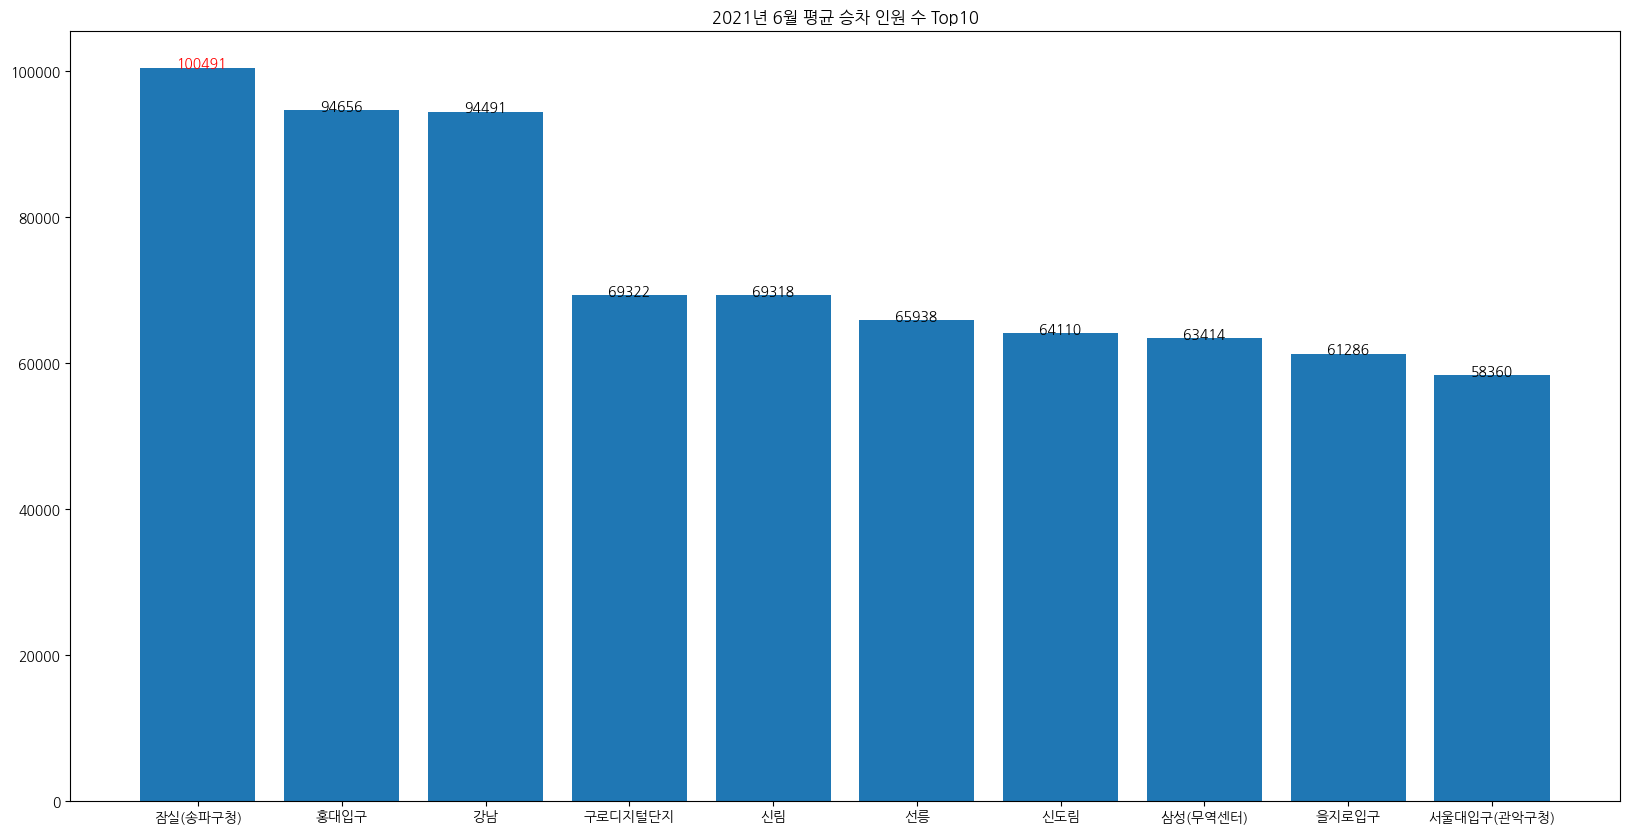

In [ ]:
# df에 저장된 승차 인원 수 Top10
top10_on = ...        # ... 코드 입력

plt.figure(figsize=(20,10))
plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2024년 10월 평균 승차 인원 수 Top10')
plt.show()

평균 하차 인원은 거의 동일하게 **홍대입구 > 잠실 > 강남 > 구로디지털단지 > 신림 > 역삼** 순으로 많았습니다.

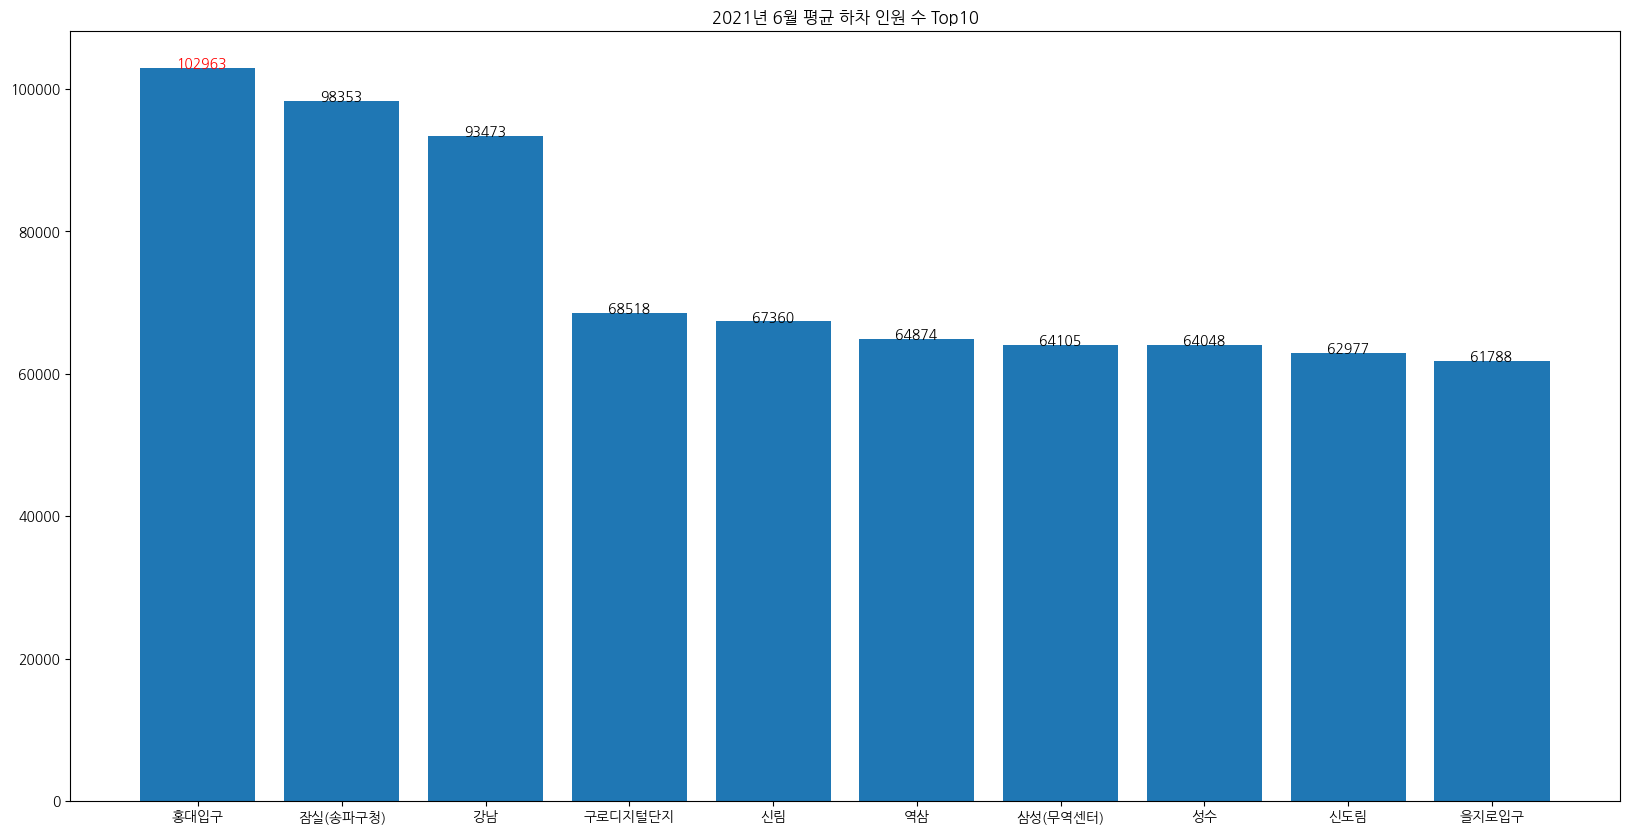

In [ ]:
# 하차 인원 수 Top10
top10_off = ...        # ... 코드 입력
plt.figure(figsize=(20,10))

...        # ... 코드 입력
for x, y in enumerate(list(top10_off['평균 하차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2024년 10월 평균 하차 인원 수 Top10')
plt.show()

**퀴즈1. 6호선의 지하철 역 중에서 승차 인원수가 가장 많은 역명을 구하세요.**

In [ ]:
# 3.2.의 첫 번째 셀에서 line값만 수정한 후
# 3.2.와 3.3. 코드를 순서대로 다시 실행해보면 답을 구할 수 있습니다.

In [ ]:
line = '6호선'
metro_st = ...        # ... 코드 입력
metro_st_line6 = ...        # ... 코드 입력
metro_st_line6

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
176,6호선,고려대(종암),202410.0,41.0,8.0,4045.0,1061.0,7745.0,4937.0,21104.0,...,4002.0,8377.0,714.0,2402.0,0.0,43.0,0.0,1.0,0.0,0.0
177,6호선,공덕,202410.0,146.0,1.0,5622.0,2482.0,9386.0,12315.0,23450.0,...,9948.0,11006.0,1296.0,4304.0,0.0,97.0,0.0,0.0,0.0,0.0
178,6호선,광흥창(서강),202410.0,4.0,0.0,3388.0,1548.0,8110.0,5615.0,21497.0,...,2542.0,5708.0,382.0,1669.0,0.0,0.0,0.0,0.0,0.0,0.0
179,6호선,구산,202410.0,35.0,2.0,6932.0,168.0,12977.0,2145.0,31941.0,...,1369.0,5458.0,180.0,1666.0,0.0,0.0,0.0,0.0,0.0,0.0
180,6호선,녹사평(용산구청),202410.0,30.0,0.0,1326.0,631.0,2154.0,4535.0,4854.0,...,5817.0,2954.0,713.0,914.0,0.0,0.0,0.0,0.0,0.0,0.0
181,6호선,대흥(서강대앞),202410.0,6.0,0.0,2750.0,1186.0,5735.0,5422.0,15866.0,...,4419.0,6302.0,629.0,1614.0,0.0,1.0,0.0,0.0,0.0,0.0
182,6호선,독바위,202410.0,4.0,0.0,2551.0,254.0,5025.0,1247.0,14483.0,...,376.0,2968.0,71.0,1129.0,0.0,0.0,0.0,0.0,0.0,0.0
183,6호선,돌곶이,202410.0,43.0,0.0,7734.0,2062.0,15887.0,7450.0,41329.0,...,2543.0,8862.0,393.0,2898.0,0.0,0.0,0.0,0.0,0.0,0.0
184,6호선,동묘앞,202410.0,124.0,2.0,5172.0,955.0,5675.0,4352.0,11128.0,...,3226.0,8711.0,484.0,2400.0,0.0,59.0,0.0,0.0,0.0,0.0
185,6호선,디지털미디어시티,202410.0,154.0,6.0,7313.0,3066.0,17504.0,11951.0,53589.0,...,3302.0,11991.0,686.0,5135.0,0.0,20.0,0.0,1.0,0.0,0.0


In [ ]:
# '승차인원' 이름이 포함된 열만 선택
on_columns = ...        # ... 코드 입력

# 승차 인원 데이터프레임 생성
metro_get_on = ...        # ... 코드 입력

# '지하철역'을 인덱스로 설정
metro_get_on = ...        # ... 코드 입력
metro_get_on

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
고려대(종암),41.0,4045.0,7745.0,21104.0,28151.0,15659.0,11727.0,12324.0,13586.0,16212.0,...,23488.0,12023.0,9950.0,12618.0,8922.0,4002.0,714.0,0.0,0.0,0.0
공덕,146.0,5622.0,9386.0,23450.0,34127.0,26050.0,22765.0,24243.0,24669.0,26324.0,...,83916.0,37134.0,30569.0,31260.0,22937.0,9948.0,1296.0,0.0,0.0,0.0
광흥창(서강),4.0,3388.0,8110.0,21497.0,28199.0,18589.0,14714.0,15395.0,15975.0,13905.0,...,29154.0,13932.0,10699.0,10641.0,6785.0,2542.0,382.0,0.0,0.0,0.0
구산,35.0,6932.0,12977.0,31941.0,40085.0,22529.0,15582.0,14362.0,14515.0,12919.0,...,10264.0,6637.0,4980.0,4003.0,3855.0,1369.0,180.0,0.0,0.0,0.0
녹사평(용산구청),30.0,1326.0,2154.0,4854.0,7716.0,6736.0,5556.0,5901.0,6460.0,6855.0,...,20818.0,13916.0,12594.0,13885.0,11429.0,5817.0,713.0,0.0,0.0,0.0
대흥(서강대앞),6.0,2750.0,5735.0,15866.0,23372.0,15186.0,11678.0,12290.0,14311.0,18638.0,...,28060.0,14071.0,12616.0,13787.0,12171.0,4419.0,629.0,0.0,0.0,0.0
독바위,4.0,2551.0,5025.0,14483.0,13312.0,7440.0,5045.0,4604.0,4717.0,4290.0,...,3121.0,1888.0,1256.0,864.0,605.0,376.0,71.0,0.0,0.0,0.0
돌곶이,43.0,7734.0,15887.0,41329.0,45284.0,24023.0,16559.0,14735.0,15998.0,14820.0,...,16719.0,10889.0,6754.0,6509.0,5297.0,2543.0,393.0,0.0,0.0,0.0
동묘앞,124.0,5172.0,5675.0,11128.0,16839.0,13886.0,13236.0,15502.0,18522.0,18862.0,...,23697.0,13548.0,10115.0,8021.0,6200.0,3226.0,484.0,0.0,0.0,0.0


In [ ]:
# '하차인원' 이름이 포함된 열만 선택
off_columns = ...        # ... 코드 입력
# 하차 데이터프레임 생성
metro_get_off = ...        # ... 코드 입력

# '지하철역'을 인덱스로 설정
metro_get_off = ...        # ... 코드 입력
metro_get_off

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
고려대(종암),8.0,1061.0,4937.0,12981.0,30170.0,16010.0,15545.0,11467.0,11069.0,14316.0,...,26866.0,19637.0,12598.0,12081.0,11984.0,8377.0,2402.0,43.0,1.0,0.0
공덕,1.0,2482.0,12315.0,39916.0,98801.0,49304.0,24342.0,22557.0,22841.0,23588.0,...,46193.0,29646.0,19763.0,18441.0,15849.0,11006.0,4304.0,97.0,0.0,0.0
광흥창(서강),0.0,1548.0,5615.0,15334.0,32745.0,19545.0,12872.0,10808.0,11659.0,11645.0,...,26394.0,18946.0,12032.0,10495.0,10030.0,5708.0,1669.0,0.0,0.0,0.0
구산,2.0,168.0,2145.0,6901.0,7699.0,5940.0,5739.0,7330.0,7539.0,8174.0,...,23794.0,20496.0,11488.0,10177.0,8809.0,5458.0,1666.0,0.0,0.0,0.0
녹사평(용산구청),0.0,631.0,4535.0,9286.0,17405.0,9501.0,8388.0,8589.0,10900.0,11497.0,...,16510.0,10974.0,6977.0,5913.0,4826.0,2954.0,914.0,0.0,0.0,0.0
대흥(서강대앞),0.0,1186.0,5422.0,16895.0,37035.0,21251.0,20350.0,14454.0,14617.0,18189.0,...,27973.0,17490.0,10823.0,9442.0,9025.0,6302.0,1614.0,1.0,0.0,0.0
독바위,0.0,254.0,1247.0,2247.0,3577.0,3590.0,3529.0,2955.0,3371.0,3423.0,...,12287.0,10503.0,6250.0,5325.0,5080.0,2968.0,1129.0,0.0,0.0,0.0
돌곶이,0.0,2062.0,7450.0,6667.0,18119.0,11985.0,9387.0,9984.0,11863.0,12643.0,...,36292.0,29043.0,16602.0,14839.0,14002.0,8862.0,2898.0,0.0,0.0,0.0
동묘앞,2.0,955.0,4352.0,8626.0,22465.0,18506.0,17727.0,18793.0,18492.0,20277.0,...,20108.0,15428.0,10728.0,10556.0,10886.0,8711.0,2400.0,59.0,0.0,0.0


In [ ]:
# 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)
df

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
고려대(종암),11697,11168
공덕,23762,23031
광흥창(서강),11767,11100
구산,10569,7805
녹사평(용산구청),7281,7575
대흥(서강대앞),11966,12391
독바위,3533,3741
돌곶이,12867,11787
동묘앞,11797,11884


In [ ]:
top1_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(1)
top1_on

,평균 승차 인원 수,평균 하차 인원 수
지하철역,,
공덕,23762,23031


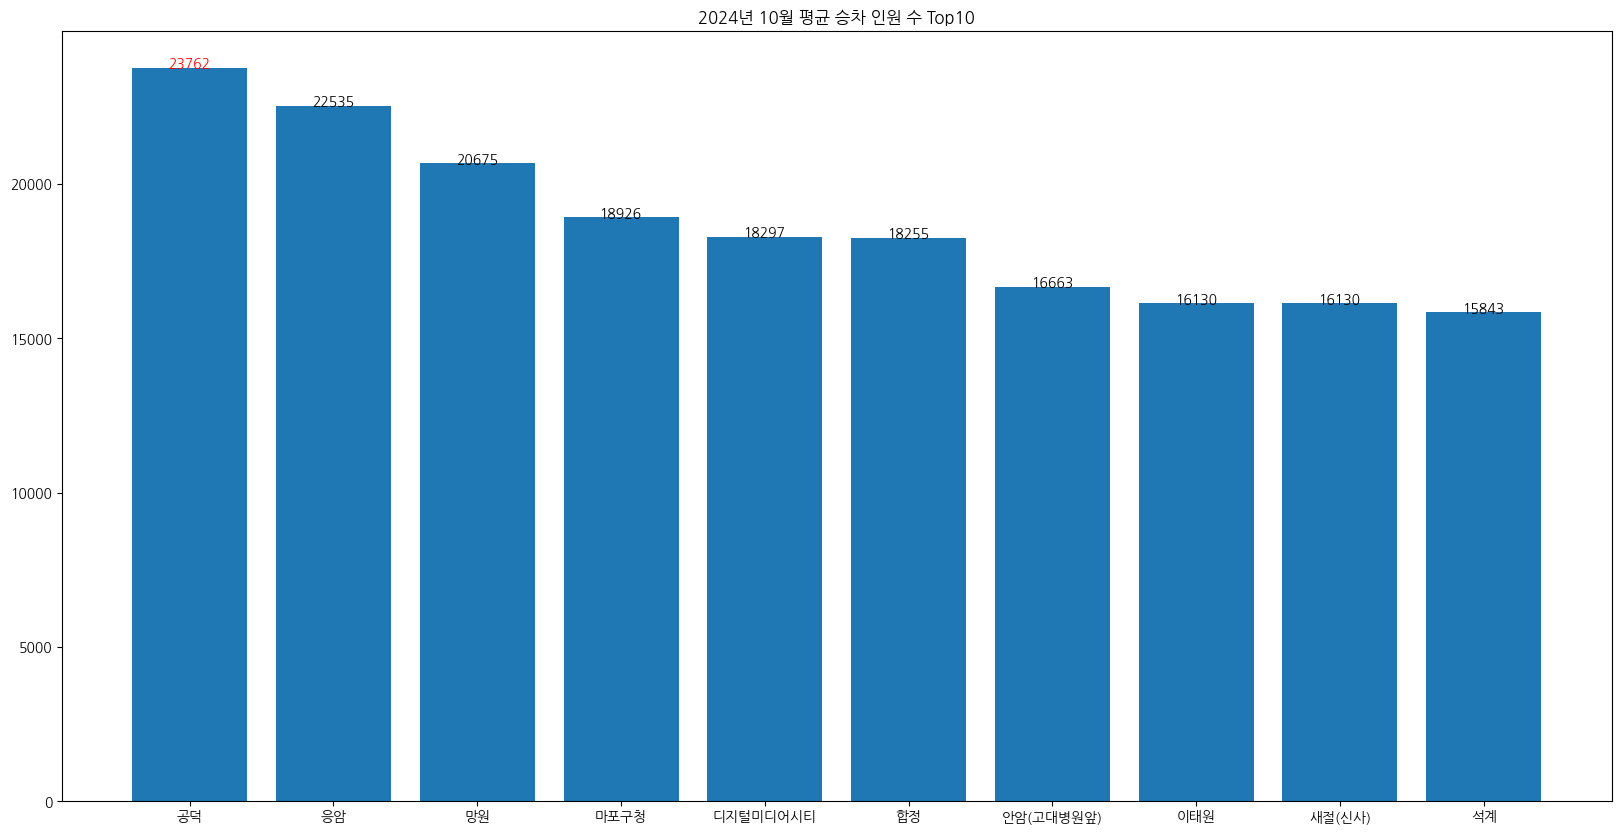

In [ ]:
# 승차 인원 수 Top10
top10_on = df.sort_values(by='평균 승차 인원 수', ascending=False).head(10)

plt.figure(figsize=(20,10))

plt.bar(top10_on.index, top10_on['평균 승차 인원 수'])
for x, y in enumerate(list(top10_on['평균 승차 인원 수'])):
    if x == 0:
        plt.annotate(y, (x-0.15, y), color = 'red')
    else:
        plt.annotate(y, (x-0.15, y))

plt.title('2024년 10월 평균 승차 인원 수 Top10')
plt.show()

### 3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합

특정 호선의 지하철 역 마다 지도에 정보를 출력하기 위해서는 각 위치의 좌표정보가 필요합니다.

이를 해결하기 위해 카카오 API를 활용하여 csv 파일로 만들어두었습니다.

출처: <br>
https://developers.kakao.com/docs/latest/ko/local/dev-guide#search-by-keyword<br>
https://developers.kakao.com/docs/latest/ko/local/dev-guide#address-coord

In [ ]:
# 지하철 역 위치 좌표 파일 공유폴더에서 다운로드
#!gdown 19nvICMhQykdp3J1XTN6cz0Wa7Giz5YBr

Downloading...
From: https://drive.google.com/uc?id=19nvICMhQykdp3J1XTN6cz0Wa7Giz5YBr
To: /content/지하철 역 위치 좌표.csv
100% 47.1k/47.1k [00:00<00:00, 72.9MB/s]


In [ ]:
# 지하철 역별 위치좌표에 대한 데이터를 불러옵니다.
subway_location = pd.read_csv('지하철 역 위치 좌표.csv')
subway_location

,지하철역,주소,x좌표,y좌표
0,4.19민주묘지역,서울 강북구 우이동 72-182,37.649457,127.013506
1,가능역,경기 의정부시 가능동 197-1,37.747906,127.044358
2,가락시장역,서울 송파구 가락동 184-23,37.492915,127.118215
3,가산디지털단지역,서울 금천구 가산동 468-4,37.482414,126.882240
4,가양역,서울 강서구 가양동 14-61,37.561758,126.853997
...,...,...,...,...
574,회룡역,경기 의정부시 호원동 50-5,37.713908,127.046619
575,회현역,서울 중구 남창동 64-1,37.557688,126.976720
576,회현역,서울 중구 남창동 64-1,37.557688,126.976720
577,효창공원앞역,서울 용산구 효창동 80,37.539622,126.960984


먼저 특정 호선의 역별 평균 승하차 인원 수와 지하철 역별 위치좌표 데이터를 병합하여 데이터프레임을 생성해봅시다.

In [ ]:
# 특정 호선의 역별 평균 승하차 인원 수와 지하철 역 위치 좌표를 데이터프레임으로 반환하는 함수입니다.
def get_nums_and_location(line, metro_st):

    # 특정 호선의 데이터만 추출합니다.
    metro_line_n = metro_st[metro_st['호선명']==line]

    # '승차인원' 이름이 포함된 열만 선택
    on_columns = [col for col in metro_line_n.columns if '승차인원' in col]
    # 승차 인원 데이터프레임 생성
    metro_get_on = metro_line_n[['지하철역'] + on_columns]
    # '지하철역'을 인덱스로 설정
    metro_get_on = metro_get_on.set_index('지하철역')

    # '하차인원' 이름이 포함된 열만 선택
    off_columns = [col for col in metro_line_n.columns if '하차인원' in col]
    # 하차 인원 데이터프레임 생성
    metro_get_off = metro_line_n[['지하철역'] + off_columns]
    # '지하철역'을 인덱스로 설정
    metro_get_off = metro_get_off.set_index('지하철역')

    # 역 별 평균 승하차 인원을 구한 후 정수로 형 변환하여 데이터프레임으로 저장합니다.
    df = pd.DataFrame(index = metro_line_n['지하철역'])
    df['평균 승차 인원 수'] = metro_get_on.mean(axis=1).astype(int)
    df['평균 하차 인원 수'] = metro_get_off.mean(axis=1).astype(int)

    # 지하철역 명 동일하도록 설정합니다.
    temp = []
    df = df.reset_index()
    for name in df['지하철역']:
        temp.append(name.split('(')[0]+'역')
    df['지하철역'] = temp

    # 지하철역 명을 기준으로 두 데이터프레임 병합합니다.
    df = df.merge(subway_location, left_on='지하철역', right_on='지하철역')
    return df

In [ ]:
# 6호선의 지하철 승하차 평균 인원수 및 지하철 위치 좌표
get_nums_and_location('6호선', metro_st)

### 3.5. 특정 호선의 혼잡 정도를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [ ]:
!pip install folium

In [ ]:
import folium

# 특정 위도, 경도 중심으로 하는 OpenStreetMap을 출력
map_osm = folium.Map(location = [37.529622, 126.984307], zoom_start=12)
map_osm

이제 특정 호선의 역별 평균 승차 인원 수를 원형마커를 통해 지도에 출력해봅시다.

In [ ]:
# 특정 호선의 역별 평균 승하차 인원 수와 위치좌표 데이터만 추출합니다.
rail = '6호선'
df = get_nums_and_location(rail, metro_st)

# 서울의 중심에 위치하는 명동역의 위도와 경도를 중심으로 지도 출력합니다.
latitude = subway_location[subway_location['지하철역']=='명동역']['x좌표']
longitude = subway_location[subway_location['지하철역']=='명동역']['y좌표']
map_osm = folium.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철 역의 위치별로 원형마커를 지도에 추가합니다.
for i in df.index:
    marker = folium.CircleMarker([df['x좌표'][i],df['y좌표'][i]],
                        radius = (df['평균 승차 인원 수'][i]+1)/3000, # 인원 수가 0일 때 계산오류 보정
                        popup = [df['지하철역'][i],df['평균 승차 인원 수'][i]],
                        color = 'blue',
                        fill_color = 'blue')
    marker.add_to(map_osm)

map_osm

/usr/local/lib/python3.10/dist-packages/folium/utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/usr/local/lib/python3.10/dist-packages/folium/utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/usr/local/lib/python3.10/dist-packages/folium/utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


**퀴즈2. 강남역의 x좌표(위도)를 구하세요.**

In [ ]:
# get_nums_and_location() 함수를 활용하면 쉽게 구할 수 있습니다.
# 강남역은 2호선이기 때문에 df = get_nums_and_location('2호선', metro_st)으로 데이터프레임을 추출합니다.
# df[df['지하철역']=='강남역']['x좌표']을 통해 컬럼 '지하철역'이 '강남역'인 행을 추출하고 'x좌표'값을 구해보세요.


In [ ]:
# 특정 호선의 역별 평균 승하차 인원 수와 위치좌표 데이터만 추출합니다.
rail = '2호선'
df = get_nums_and_location(rail, metro_st)

# 서울의 중심에 위치하는 강남역의 위도와 경도를 중심으로 지도 출력합니다.
latitude = subway_location[subway_location['지하철역']=='강남역']['x좌표']
longitude = subway_location[subway_location['지하철역']=='강남역']['y좌표']
map_osm = folium.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철 역의 위치별로 원형마커를 지도에 추가합니다.
for i in df.index:
    marker = folium.CircleMarker([df['x좌표'][i],df['y좌표'][i]],
                        radius = (df['평균 승차 인원 수'][i]+1)/3000, # 인원 수가 0일 때 계산오류 보정
                        popup = [df['지하철역'][i],df['평균 승차 인원 수'][i]],
                        color = 'blue',
                        fill_color = 'blue')
    marker.add_to(map_osm)

map_osm

/usr/local/lib/python3.10/dist-packages/folium/utilities.py:94: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/usr/local/lib/python3.10/dist-packages/folium/utilities.py:100: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/usr/local/lib/python3.10/dist-packages/folium/utilities.py:102: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


In [ ]:
latitude = subway_location[subway_location['지하철역']=='강남역']['x좌표']
longitude = subway_location[subway_location['지하철역']=='강남역']['y좌표']
print(latitude)
print(longitude)

11    37.497057
Name: x좌표, dtype: float64
11    127.028181
Name: y좌표, dtype: float64
